# Main workflow:
* Modular implementation.  
* High level programming (layer architecture).  
* Import low level functions from a python script.  

# Import libraries

In [505]:
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2
import FusionModel_tools as fm
import importlib
importlib.reload(fm)

import nltk
nltk.download('popular', quiet = True)

import os
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
## define general parameters

myseed = 123

splitting_path = '../Splitted_datasets/'
preprocessing_path = '../Preprocessed_data/'
training_path = '../Trained_models_and_metrics/'
images_path = '../datasets/image_train/'

fusion_path = '../Fusion_models_and_data/'

### product categories

In [112]:
product_class = pd.read_csv('../datasets/product_class.csv', sep = ';')
print(product_class.shape)
product_class.head()

(27, 3)


,target,prdtypecode,prodtype
0,0,10,livres_adulte
1,24,40,jeux_videos_import
2,25,50,accessoires_jeux_videos
3,26,60,jeux_et_consoles_retro
4,1,1140,goodies_geek


# 1 - Import raw dataset (Optional)
* Define train & test splits
* Split entire dataset once here to avoid any issues (information leak, etc)

### Import raw datasets: features and targets

In [10]:
## import raw datasets: features and target
df_X = pd.read_csv('../datasets/X_train_update.csv', index_col = 0)
df_y = pd.read_csv('../datasets/Y_train_CVw08PX.csv', index_col = 0).squeeze()  ## for correct splitting

print(type(df_X), type(df_y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [4]:
display(df_X.head())
print(df_X.index)

,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            84906, 84907, 84908, 84909, 84910, 84911, 84912, 84913, 84914,
            84915],
           dtype='int64', length=84916)


In [5]:
display(df_y.head())
print(df_y.index)

0      10
1    2280
2      50
3    1280
4    2705
Name: prdtypecode, dtype: int64

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            84906, 84907, 84908, 84909, 84910, 84911, 84912, 84913, 84914,
            84915],
           dtype='int64', length=84916)


### Define train test splitting

In [ ]:
from sklearn.model_selection import train_test_split

## train-test split raw data
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size = 0.2, \
                                                                random_state = myseed, stratify = df_y)

## tranforms dataset to feed into the models

In [10]:
df_X_train.index

Int64Index([ 9263, 50884, 73788, 34901, 81204, 26065, 46256, 70161, 24947,
            32350,
            ...
            29427,  6336, 69930, 71944, 18110, 19372, 79662, 38386, 84570,
            60763],
           dtype='int64', length=67932)

In [11]:
df_y_test.index

Int64Index([76291, 35651, 23689, 27954, 53964, 25569,   462, 76121, 81032,
            80184,
            ...
            43294, 23597, 28244,  7725, 20720, 84173, 53364, 62653, 33334,
            83750],
           dtype='int64', length=16984)

### Save splitted datasets

In [ ]:
## save splitted dataframes
fm.save(datasets = [df_X_train, df_X_test, df_y_train, df_y_test], \
             types = ['dataframe', 'dataframe', 'dataframe', 'dataframe'], \
             names = ['df_X_train', 'df_X_test', 'df_y_train', 'df_y_test'], \
              path = splitting_path, doit = False, verbose = True)


<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp; 
    From now on, the <b>test dataset</b> will only be used to asses the models performance
</div>

# 2 - _Text data_

## 2.1 - Preprocess Text Data
* Clean data
* Feature engineering
* Address NaNs

In [11]:
## preprocess datasets: Data cleaning & Feature engineering

df_X_train_preprocess = fm.preprocess_text_data(df_X_train, verbose = True)
df_X_test_preprocess = fm.preprocess_text_data(df_X_test, verbose = True)


Column 'designation' has been renamed as 'title' 

Columns 'title' and 'description' have been concatenated in a new variable 'title_descr' 

Column 'title_descr' has been successfully HTML parsed and decapitalized.
	 HTML parsing takes 20.42 seconds 

Column 'title_descr' has been successfully tokenized.
	 Tokenization + Lemmatization takes 27.33 seconds 

Main language detection takes 3.73 minutes.
	 Language detection correction takes 3.17 seconds 

Removing stop-words takes 28.84 seconds. 

Token counting takes 0.03 seconds. 

Column 'designation' has been renamed as 'title' 

Columns 'title' and 'description' have been concatenated in a new variable 'title_descr' 

Column 'title_descr' has been successfully HTML parsed and decapitalized.
	 HTML parsing takes 4.36 seconds 

Column 'title_descr' has been successfully tokenized.
	 Tokenization + Lemmatization takes 5.30 seconds 

Main language detection takes 0.92 minutes.
	 Language detection correction takes 2.22 seconds 

Removing

In [13]:
df_X_train_preprocess.head()
df_X_train_preprocess.index

Int64Index([ 9263, 50884, 73788, 34901, 81204, 26065, 46256, 70161, 24947,
            32350,
            ...
            29427,  6336, 69930, 71944, 18110, 19372, 79662, 38386, 84570,
            60763],
           dtype='int64', length=67932)

### Save Preprocessed datasets

In [12]:
fm.save(datasets = [df_X_train_preprocess, df_X_test_preprocess], 
             types = ['dataframe', 'dataframe'],
             names = ['df_X_train_preprocess', 'df_X_test_preprocess'], 
              path = preprocessing_path, doit = False, verbose = True)


Saved dataset: ../Preprocessed_data/2308141824_df_X_train_preprocess.csv
Saved dataset: ../Preprocessed_data/2308141824_df_X_test_preprocess.csv


### Load preprocessed data (Optional)
It helps to free processing memory if restarting the kernel and loading the followinf datasets.

In [3]:
df_X_train_preprocess = pd.read_csv(preprocessing_path+'2308141824_df_X_train_preprocess.csv', header = 0, index_col = 0, sep = ',')
df_X_test_preprocess = pd.read_csv(preprocessing_path+'2308141824_df_X_test_preprocess.csv', header = 0, index_col = 0, sep = ',')
# df_y_train = pd.read_csv( splitting_path+'2308141824_df_y_train.csv', header = 0, index_col = 0, sep = ',')
# df_y_test = pd.read_csv( splitting_path+'2308141824_df_y_test.csv', header = 0, index_col = 0, sep = ',')

# df_X_train_preprocess.head()

## 2.2 Transform text data

### Transform text data
* In a format accepted by ML models: np.arrays.
* encode categeorical features
* normalize numerical features
* vectorize tokens
* encode target

In [15]:
## transform dataset to feed into model

text_data, targets, text_transformer, target_transformer = fm.get_text_data(df_X_train_preprocess, df_X_test_preprocess, 
                                                                            df_y_train, df_y_test)



Vectorizer Vocabulary contains : 5000 terms
First Vocabulary terms : {'lot': 2751, 'livres': 2731, 'merveilleux': 2896, 'violet': 4773, 'atterrissage': 632, 'prolongée': 3663, 'vitesse': 4785, 'appui': 541, 'protector': 3681, 'extension': 1907}


### Save transformed datasets, transformers and encoder objects

In [16]:

## Save transformed features:
fm.save(datasets = [text_data['X_train'], text_data['X_test'] ], \
             types = ['sparseMatrix', 'sparseMatrix'], \
             names = ['text_data_transformed_X_train', 'text_data_transformed_X_test'], \
              path = preprocessing_path, doit = False, verbose = True )

## save transformed targets:
fm.save(datasets = [ targets['y_train'], targets['y_test'] ], \
             types = ['array', 'array'], \
             names = ['text_data_transformed_y_train', 'text_data_transformed_y_test'], \
              path = preprocessing_path, doit = False, verbose = True )

## save tranformers:
fm.save(datasets = [ text_transformer['token_len_scaler'], text_transformer['language_encoder'],\
                     text_transformer['lemmas_vectorizer'], target_transformer], \
             types = ['transformer', 'transformer','transformer', 'transformer'], \
             names = ['token_len_scaler','language_encoder', 'lemmas_vectorizer', 'target_encoder'], \
              path = preprocessing_path, doit = False, verbose = True )


Saved sparseMatrix : ../Preprocessed_data/2308141825_text_data_transformed_X_train.npz
Saved sparseMatrix : ../Preprocessed_data/2308141825_text_data_transformed_X_test.npz
Saved dataset: ../Preprocessed_data/2308141825_text_data_transformed_y_train.npy
Saved dataset: ../Preprocessed_data/2308141825_text_data_transformed_y_test.npy
Saved transformer: ../Preprocessed_data/2308141825_token_len_scaler
Saved transformer: ../Preprocessed_data/2308141825_language_encoder
Saved transformer: ../Preprocessed_data/2308141825_lemmas_vectorizer
Saved transformer: ../Preprocessed_data/2308141825_target_encoder


### Load transformed data (Optional)
Start from here if RAM is limited

**Features**

In [5]:
from scipy import sparse

text_data = {}

text_data['X_train'] = sparse.load_npz("../Preprocessed_data/2308141825_text_data_transformed_X_train.npz")
text_data['X_test'] = sparse.load_npz("../Preprocessed_data/2308141825_text_data_transformed_X_test.npz")

**Targets**

In [6]:
targets = {}
targets['y_train'] = np.load("../Preprocessed_data/2308141825_text_data_transformed_y_train.npy")
targets['y_test'] = np.load("../Preprocessed_data/2308141825_text_data_transformed_y_test.npy")

**Transformers**

In [18]:
import joblib

# token_len_scaler = joblib.load("../Preprocessed_data/2308141825_token_len_scaler")
# language_encoder = joblib.load("../Preprocessed_data/2308141825_language_encoder")
# lemmas_vectorizer = joblib.load("../Preprocessed_data/2308141825_lemmas_vectorizer")
# target_encoder = joblib.load("../Preprocessed_data/2308141825_target_encoder")

## 2.3 Text modeling

### Initialize text model

In [7]:
## intialize text model:

text_model = fm.initialize_text_model(model_type  = "NN", \
                             Nb_features = text_data['X_train'].shape[1], \
                             Nb_classes  = targets['y_train'].shape[1])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 5035)]            0         
                                                                 
 dense_1 (Dense)             (None, 256)               1289216   
                                                                 
 dense_2 (Dense)             (None, 27)                6939      
                                                                 
Total params: 1,296,155
Trainable params: 1,296,155
Non-trainable params: 0
_________________________________________________________________


None

### Fit text model 

In [9]:
## train model
text_model.fit(text_data["X_train"].toarray(), targets["y_train"],
               epochs = 5,
              batch_size = 200,
              validation_split = 0.2)    ## 


Epoch 1/5
272/272 [==============================] - 4s 12ms/step - loss: 1.8166 - accuracy: 0.5362 - val_loss: 1.0011 - val_accuracy: 0.7279
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.8173 - accuracy: 0.7671 - val_loss: 0.7917 - val_accuracy: 0.7637
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.6397 - accuracy: 0.8086 - val_loss: 0.7451 - val_accuracy: 0.7710
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.5462 - accuracy: 0.8350 - val_loss: 0.7297 - val_accuracy: 0.7774
Epoch 5/5
272/272 [==============================] - 3s 10ms/step - loss: 0.4817 - accuracy: 0.8542 - val_loss: 0.7337 - val_accuracy: 0.7744


### Evaluate text model
Create a function that returns:  
* training evolution plot
* train test accuracy
* confusion matrix plot
* classification report graph

Add as options to save:
* confusion matrix
* classification report

In [ ]:
### The following is preliminary overview (PUT INTO AFUNCTION)

In [90]:
epochs = 50
x_epochs = np.arange(1,epochs + 1,1)

train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

In [ ]:
plt.figure(figsize=(8,6))

sns.lineplot(x = x_epochs, y = train_acc, marker = 'o', label = 'Training Accuracy')
sns.lineplot(x = x_epochs, y = val_acc, marker = 'o', label = 'Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Evolution during training: NN_clf')
plt.legend(loc='lower right')#loc='right'
plt.ylim(0,1)
# plt.ylim(0.3,0.5)
# plt.xlim(0,50)

### Save or Reload trained text model

In [11]:
save = False
reload = False

import tensorflow as tf

if save:
    fm.save_model(text_model, name = 'text_model_trained', 
                  path = fusion_path, 
                  doit = True)
    

if reload:
    text_model = fm.reload_model('model.keras', 
                       path = fusino_path, 
                       doit = True)
    text_model.summary()

Model saved as ../Fusion_models_and_data/2308171443_text_model_trained.keras


# 3 - _Image data_

* preprocess image data: crop, resize, vectorize
* save prpprocessed image_dataset
* transform image data: scale pixels, reshape for CNN
* initialize model (using tranformed data dimensions)
* save trained model
* reload trained model


## 3.1 - Preprocess image data
* crop
* resize
* vectorize

In [5]:

image_train_preprocess = fm.preprocess_image_data(df_X_train_preprocess, 
                                                     threshold = 230, 
                                                     new_pixel_nb = 200,
                                                     path = images_path,                                                     
                                                     output = 'array',
                                                     verbose = True)


0 images at time 0.00 minutes
1000 images at time 0.13 minutes
2000 images at time 0.26 minutes
3000 images at time 0.39 minutes
4000 images at time 0.53 minutes
5000 images at time 0.66 minutes
10000 images at time 1.31 minutes
15000 images at time 1.96 minutes
20000 images at time 2.62 minutes
25000 images at time 3.27 minutes
30000 images at time 3.92 minutes
35000 images at time 4.57 minutes
40000 images at time 5.20 minutes
45000 images at time 5.84 minutes
50000 images at time 6.49 minutes
55000 images at time 7.13 minutes
60000 images at time 7.78 minutes
65000 images at time 8.44 minutes
Vectorization of 67932 images takes 8.82 minutes


In [6]:
image_test_preprocess = fm.preprocess_image_data(df_X_test_preprocess, 
                                                     threshold = 230, 
                                                     new_pixel_nb = 200,
                                                     path = images_path,
                                                     output = 'array',
                                                     verbose = True)


0 images at time 0.00 minutes
1000 images at time 0.13 minutes
2000 images at time 0.25 minutes
3000 images at time 0.38 minutes
4000 images at time 0.51 minutes
5000 images at time 0.63 minutes
10000 images at time 1.28 minutes
15000 images at time 1.92 minutes
Vectorization of 16984 images takes 2.18 minutes


### Save preprocessed image data

In [8]:
fm.save(datasets = [image_train_preprocess, image_test_preprocess], \
            types = ['array', 'array'], \
             names = ['image_train_preprocess_200px', 'image_test_preprocess_200px'], \
              path = preprocessing_path, doit = False, verbose = True)

Saved dataset: ../Preprocessed_data/2308151632_image_train_preprocess_200px.npy
Saved dataset: ../Preprocessed_data/2308151632_image_test_preprocess_200px.npy


### Load preprocessed image data
Optional. It helps to free processing memory if restarting the kernel and loading the followinf datasets.

In [3]:
# df_X_train_preprocess = pd.read_csv('./Preprocessed_data/2308102210_df_image_train_preprocess.csv', header = 0, index_col = 0, sep = ',')
# df_X_test_preprocess = pd.read_csv('./Preprocessed_data/2308102210_df_image_test_preprocess.csv', header = 0, index_col = 0, sep = ',')


## reload saved numpy array for preprocessed image data
import os

image_train_preprocess = np.load(os.path.join(preprocessing_path, '2308151632_image_train_preprocess_200px.npy'))
image_test_preprocess = np.load(os.path.join(preprocessing_path, '2308151632_image_test_preprocess_200px.npy'))


## targets are in dataframes
# df_y_train = pd.read_csv(splitting_path + '2308141811_df_y_train.csv', header = 0, index_col = 0, sep = ',')
# df_y_test = pd.read_csv(splitting_path + '2308141811_df_y_test.csv', header = 0, index_col = 0, sep = ',')


## 3.2 Transform image data
* In a format accepted by ML models: np.arrays.
* encode categeorical features
* normalize numerical features
* vectorize tokens
* encode target

In [11]:
image_data = fm.get_image_data(image_train_preprocess, image_test_preprocess, pixel_per_side = 200, scale = 255)

MemoryError: Unable to allocate 60.7 GiB for an array with shape (67932, 200, 200, 3) and data type float64

### Save transformed image data

In [38]:
## THIS takes about 5 - 7 minutes

fm.save(datasets = [ image_data['train'], image_data['test'] ], \
            types = ['arrayXL', 'arrayXL'], \
             names = ['image_train_transformed', 'image_test_transformed'], \
              path = preprocessing_path, doit = False, verbose = True)

Saved compressed large array: ../Preprocessed_data/2308141953_image_train_transformed.npz
Saved compressed large array: ../Preprocessed_data/2308141953_image_test_transformed.npz


### Load transformed image data (optional)

**Features**

In [4]:
t0 = time.time()

image_data = {}

image_data['train'] = np.load("../Preprocessed_data/2308141953_image_train_transformed.npz")['array']
image_data['test'] = np.load("../Preprocessed_data/2308141953_image_test_transformed.npz")['array']

t1 = time.time()
print("Loading arrays takes %0.2f seconds" %(t1-t0))

Loading arrays takes 36.41 seconds


**Targets**

In [5]:
targets = {}
targets['y_train'] = np.load("../Preprocessed_data/2308141825_text_data_transformed_y_train.npy")
targets['y_test'] = np.load("../Preprocessed_data/2308141825_text_data_transformed_y_test.npy")


**Transformers**

In [18]:
# import joblib

# token_len_scaler = joblib.load("../Preprocessed_data/2308141825_token_len_scaler")
# language_encoder = joblib.load("../Preprocessed_data/2308141825_language_encoder")
# lemmas_vectorizer = joblib.load("../Preprocessed_data/2308141825_lemmas_vectorizer")
# target_encoder = joblib.load("../Preprocessed_data/2308141825_target_encoder")

## 3.3 Image model

### initialize image model

In [7]:
## intialize image model:

image_model = fm.initialize_image_model(model_type  = "CNN", 
                             image_shape = image_data['train'].shape[1:], 
                             Nb_classes  = targets['y_train'].shape[1])


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 8)       224       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 8)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 23, 23, 32)        6432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 11, 11, 32)        0   

### Fit image model

In [8]:
import time
t0 = time.time()

training_history = image_model.fit(image_data["train"], targets["y_train"],
                             validation_split = 0.2,
                             epochs = 40,
                             batch_size = 400)


t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(image_data["train"].shape[0], (t1-t0) ) )

model_date_time = fm.date_time()
print(model_date_time)

Epoch 1/40
136/136 [==============================] - 64s 449ms/step - loss: 2.8479 - accuracy: 0.1908 - val_loss: 2.5217 - val_accuracy: 0.2759
Epoch 2/40
136/136 [==============================] - 39s 285ms/step - loss: 2.5378 - accuracy: 0.2726 - val_loss: 2.3813 - val_accuracy: 0.3174
Epoch 3/40
136/136 [==============================] - 37s 272ms/step - loss: 2.4277 - accuracy: 0.3011 - val_loss: 2.3012 - val_accuracy: 0.3416
Epoch 4/40
136/136 [==============================] - 38s 278ms/step - loss: 2.3508 - accuracy: 0.3218 - val_loss: 2.2556 - val_accuracy: 0.3500
Epoch 5/40
136/136 [==============================] - 41s 300ms/step - loss: 2.2835 - accuracy: 0.3418 - val_loss: 2.1868 - val_accuracy: 0.3711
Epoch 6/40
136/136 [==============================] - 39s 285ms/step - loss: 2.2275 - accuracy: 0.3557 - val_loss: 2.1337 - val_accuracy: 0.3823
Epoch 7/40
136/136 [==============================] - 39s 287ms/step - loss: 2.1860 - accuracy: 0.3670 - val_loss: 2.1126 - val_ac

NameError: name 'XX_train' is not defined

In [9]:
print("For %d observations, training time = %0.2f seconds" %(image_data["train"].shape[0], (t1-t0) ) )

model_date_time = fm.date_time()
print(model_date_time)

For 67932 observations, training time = 1651.94 seconds
2308171600


In [10]:
### The following is preliminary overview (PUT INTO AFUNCTION)

In [15]:
epochs = 40
x_epochs = np.arange(1,epochs + 1,1)

train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

(0.3, 0.5)

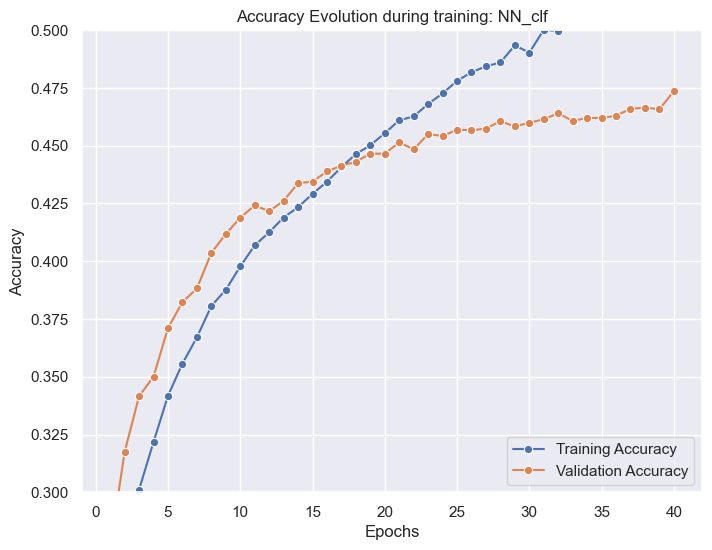

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(8,6))

sns.lineplot(x = x_epochs, y = train_acc, marker = 'o', label = 'Training Accuracy')
sns.lineplot(x = x_epochs, y = val_acc, marker = 'o', label = 'Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Evolution during training: NN_clf')
plt.legend(loc='lower right')#loc='right'
plt.ylim(0,1)
plt.ylim(0.3,0.5)
# plt.xlim(0,50)

### Save or Reload trained image model

In [19]:
save = True
reload = False

import tensorflow as tf

if save:
    fm.save_model(image_model, name = 'image_model', 
              path = fusion_path, 
              doit = True)
    

if reload:
    image_model = fm.reload_model('2308111739_image_model_trained.keras', 
                       path = fusion_path, 
                       doit = True)
    
    image_model.summary()

Model saved as ../Fusion_models_and_data/2308171602_image_model.keras


# 4 - Fusion model

**Get training data ready to feed**  
text_data = get_text_data()  
image_data = get_image_data()  

**Define headless models**  
image_model = initialize_image_model()  
text_model = initialize_text_model()  

headless_image_model = remove_classification_head(image_model)  
headless_text_model = remove_classification_head(text_model)  
headless_text_model.save("...")  
headless_image_model.save("...")  

**define train data for fusion model**  
headless_X_train_image = headless_image_model.predict(image_data["train"])  
headless_X_train_text = headless_text_model.predict(text_data["train"])  

X_train = concatenate(headless_X_train_text, headless_X_train_image)  

**define and train fusion model**  
fusion_model = build_fusion_model()  
fusion_model.fit(X_train)  
fusion_model.save("...")  


## 4.1 Load Transformed text & image data

### Reload text data: ready to use

**Features**

In [21]:
from scipy import sparse

text_data = {}

text_data['X_train'] = sparse.load_npz("../Preprocessed_data/2308141825_text_data_transformed_X_train.npz")
text_data['X_test'] = sparse.load_npz("../Preprocessed_data/2308141825_text_data_transformed_X_test.npz")

**Targets**

In [3]:
targets = {}
targets['y_train'] = np.load("../Preprocessed_data/2308141825_text_data_transformed_y_train.npy")
targets['y_test'] = np.load("../Preprocessed_data/2308141825_text_data_transformed_y_test.npy")

**Transformers**

In [18]:
import joblib

# token_len_scaler = joblib.load("../Preprocessed_data/2308141825_token_len_scaler")
# language_encoder = joblib.load("../Preprocessed_data/2308141825_language_encoder")
# lemmas_vectorizer = joblib.load("../Preprocessed_data/2308141825_lemmas_vectorizer")
# target_encoder = joblib.load("../Preprocessed_data/2308141825_target_encoder")

### Reload image data: ready to use

**Features**

In [ ]:
t0 = time.time()

image_data = {}

image_data['train'] = np.load("../Preprocessed_data/2308141953_image_train_transformed.npz")['array']
image_data['test'] = np.load("../Preprocessed_data/2308141953_image_test_transformed.npz")['array']

t1 = time.time()
print("Loading arrays takes %0.2f seconds" %(t1-t0))

**Targets**

In [ ]:
targets = {}
targets['y_train'] = np.load("../Preprocessed_data/2308141825_text_data_transformed_y_train.npy")
targets['y_test'] = np.load("../Preprocessed_data/2308141825_text_data_transformed_y_test.npy")


**Transformers**

In [107]:
import joblib

# token_len_scaler = joblib.load("../Preprocessed_data/2308141825_token_len_scaler")
# language_encoder = joblib.load("../Preprocessed_data/2308141825_language_encoder")
# lemmas_vectorizer = joblib.load("../Preprocessed_data/2308141825_lemmas_vectorizer")
target_encoder = joblib.load("../Preprocessed_data/2308141825_target_encoder")

## 4.2 Define headless models

### Headless text model

In [22]:
## load pretrained text model:  parent model

text_model = fm.reload_model('2308171443_text_model_trained.keras', 
                       path = fusion_path, 
                       doit = True)

text_model.summary()

Reloaded model from ../Trained_models_and_metrics/../Fusion_models_and_data/2308171443_text_model_trained.keras
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 5035)]            0         
                                                                 
 dense_1 (Dense)             (None, 256)               1289216   
                                                                 
 dense_2 (Dense)             (None, 27)                6939      
                                                                 
Total params: 1,296,155
Trainable params: 1,296,155
Non-trainable params: 0
_________________________________________________________________


In [23]:
## define the headless_model for text

headless_text_model = fm.remove_classification_head(text_model)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 5035)]            0         
                                                                 
 dense_1 (Dense)             (None, 256)               1289216   
                                                                 
Total params: 1,289,216
Trainable params: 1,289,216
Non-trainable params: 0
_________________________________________________________________


None

In [25]:
## verify that is actually works:

# headless_text_model.summary()
y_pred_txt_hl = headless_text_model.predict(text_data['X_test'].toarray())


531/531 [==============================] - 1s 2ms/step


array([[0.14355373, 0.2314612 , 0.16842064, ..., 0.5381603 , 0.21719632,
        0.01545572],
       [0.00907002, 0.33959135, 0.07482558, ..., 0.31742114, 0.49426466,
        0.17289968],
       [0.22684482, 0.61842453, 0.01682266, ..., 0.6515656 , 0.5254268 ,
        0.22896814],
       ...,
       [0.34377176, 0.27185744, 0.42233777, ..., 0.29474854, 0.05182475,
        0.4816504 ],
       [0.2618621 , 0.269788  , 0.16435544, ..., 0.477396  , 0.2943321 ,
        0.2629135 ],
       [0.2376819 , 0.5492548 , 0.        , ..., 0.25251457, 0.41253412,
        0.16980189]], dtype=float32)

In [33]:
# y_pred_txt_hl.shape
print("min output value = ",  y_pred_txt_hl[:,:].min())
print("max output value = ",  y_pred_txt_hl[:,:].max())

y_pred_txt_hl[0,:30]

min output value =  0.0
max output value =  1.68827


array([0.14355373, 0.2314612 , 0.16842064, 0.5179336 , 0.22738694,
       0.11514097, 0.31201583, 0.06485736, 0.14225712, 0.08956081,
       0.4223069 , 0.00448767, 0.33328274, 0.06835212, 0.32794547,
       0.12521249, 0.1079537 , 0.15924257, 0.09354137, 0.14374802,
       0.20966434, 0.22338541, 0.18610038, 0.2947622 , 0.22579446,
       0.00589401, 0.21221761, 0.52639014, 0.40577644, 0.43234372],
      dtype=float32)

### Headless image model

In [35]:
## load pretrained image model:  parent model

image_model = fm.reload_model('2308171602_image_model_trained.keras', 
                       path = fusion_path, 
                       doit = True)

image_model.summary()

Reloaded model from ../Fusion_models_and_data/2308171602_image_model_trained.keras
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 8)       224       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 8)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 23, 23, 32)        6432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                          

In [36]:
## define headless model for image data:

headless_image_model = fm.remove_classification_head(image_model)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 8)       224       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 8)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 23, 23, 32)        6432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 11, 11, 32)        0   

None

In [37]:
## verify that is actually works:

# headless_image_model.summary()
y_pred_img_hl = headless_image_model.predict(image_data['test'])


531/531 [==============================] - 4s 7ms/step


In [38]:
# y_pred_txt_hl.shimg
print("min output value = ",  y_pred_img_hl[:,:].min())
print("max output value = ",  y_pred_img_hl[:,:].max())

y_pred_img_hl[0,:30]

min output value =  0.0
max output value =  9.310035


array([0.        , 0.5069372 , 0.66847765, 1.265219  , 1.1532193 ,
       1.1676522 , 0.        , 1.3428643 , 0.69244057, 0.        ,
       0.29369545, 0.        , 0.        , 0.6790802 , 0.8474691 ,
       1.5555414 , 0.6988529 , 0.        , 0.23327723, 0.        ,
       0.        , 0.07433483, 0.6295829 , 0.12880144, 0.        ,
       0.        , 2.118503  , 0.6965375 , 0.        , 1.0092744 ],
      dtype=float32)

### Save text & image headless models

In [39]:
## save both headless models:

fm.save_model(headless_text_model, name = 'headless_text_model', 
              path = fusion_path, 
              doit = True)

fm.save_model(headless_image_model, name = 'headless_image_model', 
              path = fusion_path, 
              doit = True)


Model saved as ../Fusion_models_and_data/2308171614_headless_text_model.keras
Model saved as ../Fusion_models_and_data/2308171614_headless_image_model.keras


## 4.3 Define train data for fusion model

In [341]:

headless_X_train_text = headless_text_model.predict(text_data['X_train'].toarray())

headless_X_train_image = headless_image_model.predict(image_data['train'])

2123/2123 [==============================] - 26s 12ms/step


**Non scaled**

In [331]:
# ## concatenate both datasets
# X_train = np.hstack((headless_X_train_text,headless_X_train_image))
# print("done")

done


**normalize to be between zero and 1**

In [342]:
from sklearn.preprocessing import MinMaxScaler

txt_scaler = MinMaxScaler()
headless_X_train_text_scaled = txt_scaler.fit_transform(headless_X_train_text)

print(txt_scaler.data_min_[:10])
print(txt_scaler.data_max_[:10])


img_scaler = MinMaxScaler()
headless_X_train_image_scaled = img_scaler.fit_transform(headless_X_train_image)

print(img_scaler.data_min_[:10])
print(img_scaler.data_max_[:10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.9159853  1.0260603  0.9291283  1.2128191  0.87942886 0.9445687
 1.2553415  1.2648302  0.8475018  0.8288552 ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[6.7686505 6.0216846 3.6850863 3.774592  5.844828  3.8148594 7.6610804
 3.4858673 3.6970856 3.256486 ]


In [343]:
# ## concatenate both datasets
X_train = np.hstack((headless_X_train_text_scaled, headless_X_train_image_scaled))
print("done")

done


### Save train data for fusion model

In [257]:
## save concatenated array
fm.save(datasets = [X_train], \
            types = ['array'], \
             names = ['concatenated_headless_X_train_scaled'], \
              path = fusion_path, doit = True, verbose = True)

Saved dataset: ../Fusion_models_and_data/2308171829_concatenated_headless_X_train_scaled.npy


In [259]:
print(X_train.shape) ## check 

(67932, 384)


In [260]:
X_train.min(), X_train.max()

(0.0, 9.264089)

## 4.4 Define test data for fusion model

In [344]:

headless_X_test_text = headless_text_model.predict(text_data['X_test'].toarray())

headless_X_test_image = headless_image_model.predict(image_data['test'])

531/531 [==============================] - 4s 8ms/step


**not scaled**

In [333]:
# ## concatenate both datasets
# X_test = np.hstack((headless_X_test_text,headless_X_test_image))

**To scaled data with transformers**

In [345]:
## scale with previously trained scalers

headless_X_test_text_scaled = txt_scaler.transform(headless_X_test_text)

headless_X_test_image_scaled = img_scaler.transform(headless_X_test_image)

In [346]:
X_test = np.hstack((headless_X_test_text_scaled, headless_X_test_image_scaled))

### Save test data for fusion model

In [208]:
## save concatenated array
fm.save(datasets = [X_test], \
            types = ['array'], \
             names = ['concatenated_headless_X_test_scaled'], \
              path = fusion_path, doit = True, verbose = True)

Saved dataset: ../Fusion_models_and_data/2308171748_concatenated_headless_X_test_scaled.npy


In [209]:
print(X_test.shape) ## check 

(16984, 384)


## 4.5 Define and train fusion model 
- fusion_model = build_fusion_model()  
- fusion_model.fit(X_train)  
- fusion_model.save("...")  

### Initialize Fusion  Model

In [485]:
params_NN = {'Nb_features' : X_train.shape[1],
             'Nb_classes'  : targets['y_train'].shape[1]}

fusion_model = fm.initialize_fusion_model('NN', params = params_NN)

Model: "model_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 384)]             0         
                                                                 
 batch_normalization_91 (Bat  (None, 384)              1536      
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 256)               98560     
                                                                 
 batch_normalization_92 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 activation_37 (Activation)  (None, 256)               0         
                                                                 
 dropout_91 (Dropout)        (None, 256)               0  

None

In [486]:
### I don't need to freeze the model since the other layer are not being trained
print(targets['y_train'].shape)

(67932, 27)


### Train Fusion Model

In [487]:
training_history = fusion_model.fit(X_train, targets['y_train'],
                                     validation_split = 0.2,
                                     epochs = 20,
                                     batch_size = 400)
model_date_time = fm.date_time()

Epoch 1/20
136/136 [==============================] - 3s 11ms/step - loss: 1.3774 - accuracy: 0.6966 - val_loss: 1.8728 - val_accuracy: 0.7727
Epoch 2/20
136/136 [==============================] - 1s 7ms/step - loss: 0.6235 - accuracy: 0.8428 - val_loss: 0.9077 - val_accuracy: 0.7980
Epoch 3/20
136/136 [==============================] - 1s 7ms/step - loss: 0.4890 - accuracy: 0.8648 - val_loss: 0.6646 - val_accuracy: 0.8089
Epoch 4/20
136/136 [==============================] - 1s 7ms/step - loss: 0.4346 - accuracy: 0.8772 - val_loss: 0.6477 - val_accuracy: 0.8106
Epoch 5/20
136/136 [==============================] - 1s 8ms/step - loss: 0.4046 - accuracy: 0.8840 - val_loss: 0.6610 - val_accuracy: 0.8085
Epoch 6/20
136/136 [==============================] - 1s 7ms/step - loss: 0.3844 - accuracy: 0.8900 - val_loss: 0.6737 - val_accuracy: 0.8065
Epoch 7/20
136/136 [==============================] - 1s 8ms/step - loss: 0.3723 - accuracy: 0.8928 - val_loss: 0.6831 - val_accuracy: 0.8052
Epoch

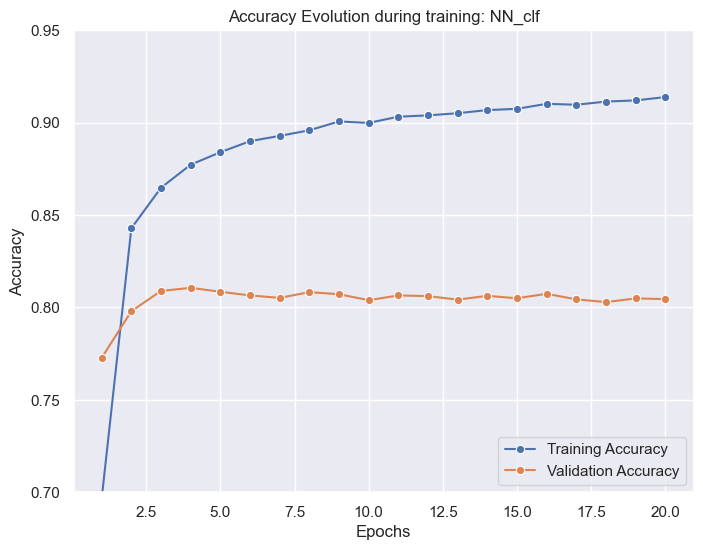

In [494]:
fm.plot_training_history(training_history, N_epochs = 20, yrange = [0.7,0.95])

## 4.6 Evaluate Fusion Model

**train test accuracy**

In [497]:
fm.get_train_test_accuracy(fusion_model, X_train, X_test, targets['y_train'], targets['y_test'])

531/531 [==============================] - 1s 2ms/step - loss: 0.7546 - accuracy: 0.7992
Train set accuracy = 0.924 and loss function = 0.27
Test  set accuracy = 0.799 and loss function = 0.75


**Confusion Matrix**

In [498]:
y_pred_vectors = fusion_model.predict(X_test)

531/531 [==============================] - 1s 2ms/step


In [528]:
cm = fm.get_confusionMatrix(targets['y_test'], y_pred_vectors, 
                       target_encoder, product_class['prdtypecode'])

(27, 27)


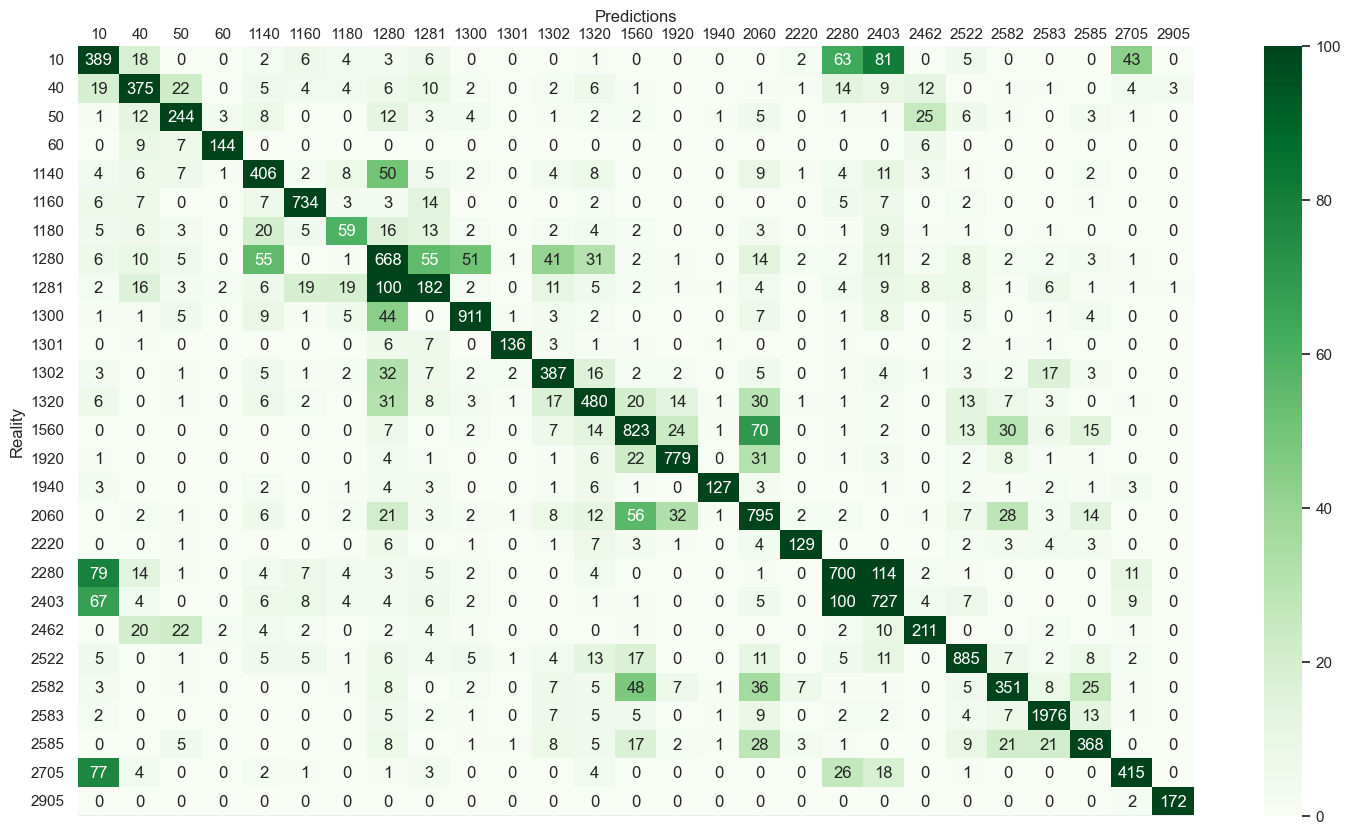

In [529]:
fm.plot_confusionMatrix(cm)

**Save confusion matrix**

In [514]:
model_date_time = fm.date_time()

fm.save_model_metrics(cm, metric_type = 'confusionMatrix', model_name = 'fusion_model',
                     path = fusion_path, timestamp = model_date_time)

../Fusion_models_and_data/2308172302_fusion_model_confusionMatrix.csv


**Classification Report: macro & micro**

In [530]:
cr, micro_cr, macro_cr = fm.get_classificationReport(targets['y_test'], y_pred_vectors,
                                                     target_encoder, product_class['prdtypecode'])

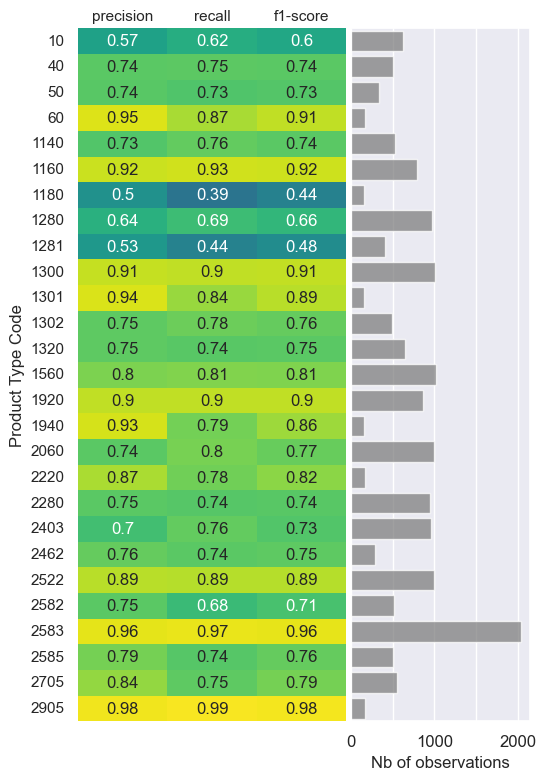

In [531]:
fm.plot_classificationReport(micro_cr)

**Save classification report**

In [537]:
fm.save_model_metrics(cr, metric_type = 'classificationReport', model_name = 'fusion_model',
                     path = fusion_path, timestamp = model_date_time)

../Fusion_models_and_data/2308172302_fusion_model_classificationReport.txt


In [532]:
print(cr)

              precision    recall  f1-score   support

          10       0.57      0.62      0.60       623
          40       0.74      0.75      0.74       502
          50       0.74      0.73      0.73       336
          60       0.95      0.87      0.91       166
        1140       0.73      0.76      0.74       534
        1160       0.92      0.93      0.92       791
        1180       0.50      0.39      0.44       153
        1280       0.64      0.69      0.66       974
        1281       0.53      0.44      0.48       414
        1300       0.91      0.90      0.91      1009
        1301       0.94      0.84      0.89       161
        1302       0.75      0.78      0.76       498
        1320       0.75      0.74      0.75       648
        1560       0.80      0.81      0.81      1015
        1920       0.90      0.90      0.90       861
        1940       0.93      0.79      0.86       161
        2060       0.74      0.80      0.77       999
        2220       0.87    

**Top Classified Categories**

In [533]:
micro_cr.sort_values(by = 'f1-score', ascending=False).head(5)

,prdtypecode,precision,recall,f1-score,support
26,2905,0.977273,0.988506,0.982857,174.0
23,2583,0.960622,0.967679,0.964138,2042.0
5,1160,0.920954,0.927939,0.924433,791.0
9,1300,0.912826,0.902874,0.907823,1009.0
3,60,0.947368,0.867470,0.905660,166.0


**Worst Classified Categories**

In [534]:
micro_cr.sort_values(by = 'f1-score', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
6,1180,0.500000,0.385621,0.435424,153.0
8,1281,0.533724,0.439614,0.482119,414.0
0,10,0.572901,0.624398,0.597542,623.0
7,1280,0.636190,0.685832,0.660079,974.0
22,2582,0.745223,0.677606,0.709808,518.0


**Less represented categories scores**

In [535]:
micro_cr.sort_values(by = 'support', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
6,1180,0.500000,0.385621,0.435424,153.0
10,1301,0.944444,0.844720,0.891803,161.0
15,1940,0.933824,0.788820,0.855219,161.0
17,2220,0.871622,0.781818,0.824281,165.0
3,60,0.947368,0.867470,0.905660,166.0


### Save trained fusion model (Optional)

In [52]:
## save trained fusion model

fm.save_model(fusion_model, name = 'fusion_model_trained', 
                                  path = fusion_path, 
                                  doit = True)


Model saved as ../Trained_models_and_metrics/2308171628_fusion_model.keras


## 4.7 Make new predictions